In [1]:
# https://rpubs.com/jkylearmstrong/Random_Forest_Regression

In [2]:
library(tidyverse)
library(randomForest)
library(caret)
library(car) # VIF
library(yardstick)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


For binary classification, the first fac

# Random Forest
#### Random Forest is an ensemble of individually trained, deep decision trees, trained on different parts of a randomly sampled training set in order to handle overfitting of individual trees. The random in Ranomd Forest refers to both the stochastic nature of selecting the observations chosen to grow each tree, as well as the random selection of features used to split each node.

The algorithm works as follows:
1) Each tree is trained on about 2/3 of the total training data, with data drawn at random from the original data **with replacement**. <br>

2) Predictior features (m) are selected at random from all the predictor features and the best m split is used to split the node. The default value of m for regression is the total number of all features, divided by 3. This value is held constant as the forest is grown. <br>

3) The misclassification rate (or Out-of-Bag (OOB) Error Rate) is calculated for each tree using the remaining 1/3 of the training data. With regression problems, the average OOB prediciton for the entire forest is calculated by taking the row mean of the OOB prediction of trees. <br>
# https://www.listendata.com/2014/11/random-forest-with-r.html#Terminologies-related-to-random-forest-algorithm-

***Each tree in a Random Forest is fully grown and is not pruned!!

## import data

In [3]:
ml_data <- read.csv('ml_predict_data.csv')

In [4]:
# assign countyname col to ml_data idx
row.names(ml_data) <- ml_data$X
# drop X col
drops <- c('X')
ml_data <- ml_data[, !(names(ml_data) %in% drops)]

## mutlicollinearity
Random Forest is affected by mutlicollinearity, which occurs when two or more independent features are highly correlated with one another in a regression model. When this happens, it means that one independent variable can be predicted from another. <br>
It's difficult to understand the effect of an independent feature on the dependent or response variable as their effects are entangled. Because the objective is to understand how each **individual** predictor is impacting the target variable, this is a problem! Although multicollinearity may not affect the accuracy of the model, it does blur the interpretability of the model as it becomes more difficult to determine the effects of individual features on the dependent, response or target variable. 
***The absence of multicollinearity is also an assumption of the Ordinary Least Squares method, which is used to arrive to the parameters of a regression model.

There are several causes of multicollinearity, one of which is referred to as the Dummy Variable Trap. This occurs when dummy variables are used to convert categorical features to numerical features.

### detecting multicollinearity
One method used to detect multi-collinearity is the Variance Inflation Factor (VIF) method. Although a corelation matrix can be used to detect multicollinearity, it only reveals bivariate relationships between variables. VIF is therefore preferred as it can show the correlation of a variable with a group of other variables. VIF is prediceted by regressing a variables against every other variables to determine the strength of the correlation between the independent variables of a dataset. The VIF score indicates how well the variable is explained by other independent variables.

R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF which is denoted below:

 - VIF=1/(1-R^2)

So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

VIF starts at 1(when R^2=0, VIF=1 – minimum value for VIF) and has no upper limit.
VIF = 1, no correlation between the independent variable and the other variables, i.e., no multicollinearity.
VIF exceeding 5 or 10 indicates high multicollinearity between the selected independent variable and other independent variables.
Some researchers assume VIF>5 as a serious issue, while others assume VIF>10 as serious.

In [5]:
lm_model <- lm(avg_perc_change ~., data = ml_data)
vif(lm_model)

new_case_count_sum           religion              civic         charitable 
          1.502798           2.599044           2.387056           2.484845 
         fraternal              union            voteage              local 
          1.460433           1.597127           4.014278           1.399299 
             state            federal      politicalacts             ethnic 
          1.407415           1.346564           1.416229           2.242743 
         ethnichpn          education        incomeequal             employ 
          3.152082           1.568242           1.722739           1.869258 
      genderincome           language              commu           nonelder 
          1.186996           4.545895           1.385279           1.974763

As each variable returns a VIF score less than 5, none indicate any significant multicollinearity or entanglement with the dataset's remaining independent variables.

## split to test and train

In [6]:
# function to scale X
normalize <- function(x) {
    return((x - min(x))/(max(x) - min(x)))
}

In [7]:
# The createDataPartition function is used to create training and test sets
trainIndex <- createDataPartition(ml_data$avg_perc_change, 
                                  p = .8, 
                                  list = FALSE, 
                                  times = 1)

TRAIN <- ml_data[trainIndex, ]
TEST <- ml_data[-trainIndex, ]

## train benchmark model

In [ ]:
set.seed(1) # 0.1484286
rf_model <- randomForest(avg_perc_change_emp~., data=TRAIN, ntree=500, mtry=3) 
print(rf_model)

In [ ]:
print("The default model is trained with 3 random variables used in each tree and a total of 500 trees used in the forest, to return a RMSE of: ") 
sqrt(0.02609141)

### scale data

In [8]:
# apply the normalize function to normalize the data
train_x_scaled = data.frame(lapply(TRAIN[, 2:21], normalize))
train_y = TRAIN[,1]

# apply the normalize function to normalize the data
test_x_scaled = data.frame(lapply(TEST[, 2:21], normalize))
test_y = TEST[,1]

In [43]:
TRAIN <- cbind(train_x_scaled, train_y)
names(TRAIN)[names(TRAIN) == 'train_y'] <- 'avg_perc_change_emp'
TEST <- cbind(test_x_scaled, test_y)
names(TEST)[names(TEST) == 'test_y'] <- 'avg_perc_change_emp'

## train scaled model

In [10]:
set.seed(1)
rf_model_scaled <- randomForest(avg_perc_change_emp ~., data=TRAIN, ntree=500, mtry=3) 
print(rf_model_scaled)


Call:
 randomForest(formula = test_y ~ ., data = cbind(test_x_scaled,      test_y), ntree = 500, mtry = 3) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.02545785
                    % Var explained: 4.08


In [ ]:
print("The default model is trained with 3 random variables used in each tree and a total of 500 trees used in the forest, to return a RMSE of: ") 
sqrt(0.02609141)

## make predictions

In [12]:
y_hat <- predict(rf_model_scaled, TEST)

#predict(diab_pop.no_na_vals.train.rf_model, diab_pop.no_na_vals.test, type ="prob")

test.rf_scored <- as_tibble(TEST)

glimpse(test.rf_scored)

Rows: 236
Columns: 21
$ new_case_count_sum <dbl> 0.082504899, 0.023256255, 0.020907378, 0.007165261,…
$ religion           <dbl> 0.07710947, 0.54845766, 0.57243383, 0.59023718, 0.4…
$ civic              <dbl> 1.0000000, 0.8750000, 0.6875000, 0.4999999, 0.31250…
$ charitable         <dbl> 0.7453581, 0.3660478, 0.4456233, 0.3209549, 0.26790…
$ fraternal          <dbl> 0.4951923, 0.5480770, 0.5769231, 0.3894231, 0.37019…
$ union              <dbl> 0.6577947, 0.2395437, 0.3840304, 0.3650190, 0.24714…
$ voteage            <dbl> 0.61905010, 0.74457215, 0.73182036, 0.68536236, 0.8…
$ local              <dbl> 0.0000000, 0.2667884, 0.5089951, 0.3498455, 0.50864…
$ state              <dbl> 0.25756493, 0.19547525, 0.16416119, 0.15983650, 0.6…
$ federal            <dbl> 0.072275977, 0.314852345, 0.088699661, 0.182773127,…
$ politicalacts      <dbl> 0.58747704, 0.27808471, 0.25598527, 0.07550646, 0.1…
$ ethnic             <dbl> 0.30938584, 0.44079687, 0.57148383, 0.21987528, 0.4…
$ ethnichpn       

In [13]:
RMSE_rf_TEST <- yardstick::rmse(test.rf_scored, truth=avg_perc_change_emp, estimate=y_hat)

RMSE_rf_TEST

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.07003797


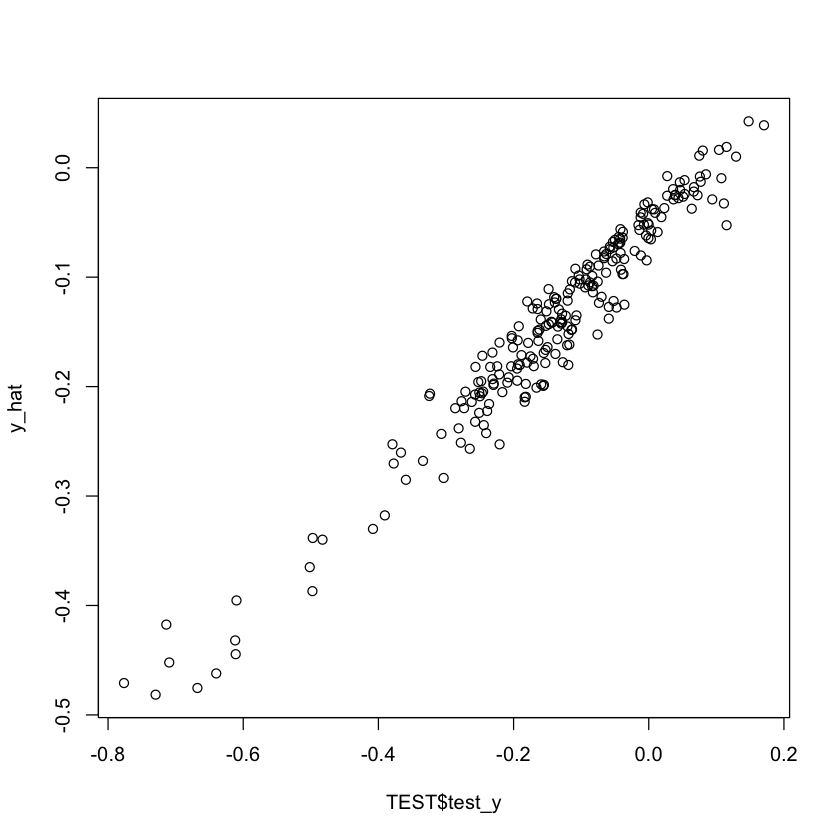

In [15]:
plot(TEST$avg_perc_change_emp, y_hat)

## hyperparameter tuning with caret package
There are two hyperparameters that are important to tune in the random forest algorithm:
 - Number of trees used in the forest (ntree)
 - Number of random variables used in each tree (mtry)

In [19]:
# Define the control
trControl <- trainControl(method = "cv",
    number = 5, # evaluate the model with a grid search of 5 folds
    search = "grid")

### search for best mtry value
The number of random variables to use in each tree

In [22]:
tuneGrid <- expand.grid(.mtry = c(1: 20)) # test from 1 to 20 variables used in each tree
rf_mtry <- train(avg_perc_change_emp ~., data=TRAIN,
    method = "rf",
    metric = "RMSE",
    tuneGrid = tuneGrid,
    trControl = trControl,
    importance = TRUE)
print(rf_mtry) # best value stored in rf_mtry$bestTune$mtry

Warning message in train.default(x, y, weights = w, ...):
“The metric "MSE" was not in the result set. RMSE will be used instead.”


Random Forest 

948 samples
 20 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 757, 759, 760, 759, 757 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared    MAE      
   1    0.1595689  0.10609117  0.1156203
   2    0.1594014  0.10627579  0.1157232
   3    0.1600306  0.10107027  0.1161297
   4    0.1597603  0.10563451  0.1161826
   5    0.1597736  0.10600724  0.1163721
   6    0.1598796  0.10643044  0.1165112
   7    0.1602285  0.10425654  0.1168370
   8    0.1605112  0.10198994  0.1168194
   9    0.1603661  0.10490164  0.1168598
  10    0.1609630  0.09885079  0.1172636
  11    0.1619987  0.09169098  0.1181966
  12    0.1610142  0.09981407  0.1173419
  13    0.1616562  0.09515805  0.1177489
  14    0.1613986  0.09729616  0.1173203
  15    0.1620292  0.09378129  0.1178061
  16    0.1619614  0.09446822  0.1178046
  17    0.1622178  0.09295865  0.1180209
  18    0.1623472  0.09259366  0.1181389
  19    0.1626258  0.08976

In [38]:
max(rf_mtry$results$RMSE)

[1] 0.1628016

In [39]:
best_mtry <- rf_mtry$bestTune$mtry

### search for best maxnodes value
the maximum amount of terminal nodes in the forest

In [46]:
store_maxnode <- list()
tuneGrid <- expand.grid(.mtry = best_mtry)

for (maxnodes in c(25: 40)) {
    set.seed(1)
    rf_maxnode <- train(avg_perc_change_emp ~., 
                        data=TRAIN,
                        method = "rf",
                        metric = "RMSE",
                        tuneGrid = tuneGrid,
                        trControl = trControl,
                        importance = TRUE,
                        maxnodes = maxnodes,
                        ntree = 500)
    current_iteration <- toString(maxnodes)
    store_maxnode[[current_iteration]] <- rf_maxnode
}
results_mtry <- resamples(store_maxnode)
summary(results_mtry)


Call:
summary.resamples(object = results_mtry)

Models: 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40 
Number of resamples: 5 

MAE 
        Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
25 0.1076430 0.1117244 0.1157559 0.1157195 0.1216876 0.1217866    0
26 0.1077262 0.1120333 0.1157812 0.1160620 0.1218873 0.1228821    0
27 0.1075471 0.1122339 0.1159929 0.1159537 0.1213414 0.1226531    0
28 0.1080270 0.1112511 0.1161407 0.1158125 0.1214106 0.1222333    0
29 0.1073100 0.1110099 0.1152036 0.1155831 0.1219065 0.1224853    0
30 0.1078816 0.1110484 0.1150065 0.1154856 0.1211130 0.1223787    0
31 0.1074952 0.1117707 0.1159591 0.1158815 0.1217586 0.1224236    0
32 0.1074691 0.1114047 0.1155176 0.1154443 0.1210692 0.1217609    0
33 0.1072104 0.1121365 0.1159240 0.1156595 0.1210163 0.1220101    0
34 0.1069677 0.1113417 0.1160229 0.1155360 0.1210190 0.1223287    0
35 0.1075322 0.1113090 0.1154114 0.1155793 0.1213978 0.1222463    0
36 0.1062515 0.1113057 0.1154758 

The average minimum RMSE is 0.1587984 and occurs when maxnodes is set to 38.

### search for best ntrees value
the number of trees used in the forest

In [47]:
store_maxtrees <- list()
for (ntree in c(250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000)) {
    set.seed(1)
    rf_maxtrees <- train(avg_perc_change_emp ~., 
                         data=TRAIN,
                         method = "rf",
                         metric = "RMSE",
                         tuneGrid = tuneGrid,
                         trControl = trControl,
                         importance = TRUE,
                         maxnodes = 38,
                         ntree = ntree)
    key <- toString(ntree)
    store_maxtrees[[key]] <- rf_maxtrees
}
results_tree <- resamples(store_maxtrees)
summary(results_tree)


Call:
summary.resamples(object = results_tree)

Models: 250, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 2000 
Number of resamples: 5 

MAE 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
250  0.1069993 0.1123598 0.1149255 0.1154555 0.1208408 0.1221518    0
300  0.1071023 0.1120301 0.1151453 0.1154508 0.1209097 0.1220667    0
350  0.1069207 0.1120719 0.1155434 0.1155103 0.1207637 0.1222519    0
400  0.1068161 0.1118766 0.1154967 0.1154375 0.1209407 0.1220573    0
450  0.1067761 0.1117807 0.1155240 0.1154453 0.1211551 0.1219908    0
500  0.1067337 0.1116165 0.1153426 0.1153770 0.1212827 0.1219095    0
550  0.1067367 0.1116918 0.1152127 0.1153347 0.1211280 0.1219040    0
600  0.1066194 0.1115741 0.1153353 0.1152927 0.1210620 0.1218724    0
800  0.1065249 0.1117105 0.1151464 0.1152362 0.1210301 0.1217690    0
1000 0.1064954 0.1116822 0.1151994 0.1152826 0.1212070 0.1218289    0
2000 0.1065697 0.1114748 0.1150763 0.1152645 0.1212677 0.1219340    0

RMSE 
         

In [59]:
final_fit_rf <- randomForest(avg_perc_change_emp ~., 
                      data = TRAIN,
                      mtry = 2,
                      ntree = 600,
                      maxnodes = 38)

In [60]:
prediction <- predict(final_fit_rf, TEST)

The overall forest error rate depends on:

1) the correlation between any two trees in the forest.
***Increasing the correlation increases the forest error rate.

2) the strength of each individual tree in the forest. 
***A tree with a low error rate is a strong classifier. Increasing the strength of the individual trees decreases the forest error rate. <br>

**Reducing** the number of random variables used in each tree (mtry) reduces both the correlation and the strength. 
**Increasing** mtry increases both. 
Somewhere in between is an **optimal** mtry value, which can be found using the OOB error rate.

In [61]:
y_hat <- predict(rf_model_scaled, TEST)

#predict(diab_pop.no_na_vals.train.rf_model, diab_pop.no_na_vals.test, type ="prob")

test.rf_scored <- as_tibble(TEST)
RMSE_rf_TEST <- yardstick::rmse(test.rf_scored, truth=avg_perc_change_emp, estimate=y_hat)

RMSE_rf_TEST

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.07003797


# Feature Importance Plot

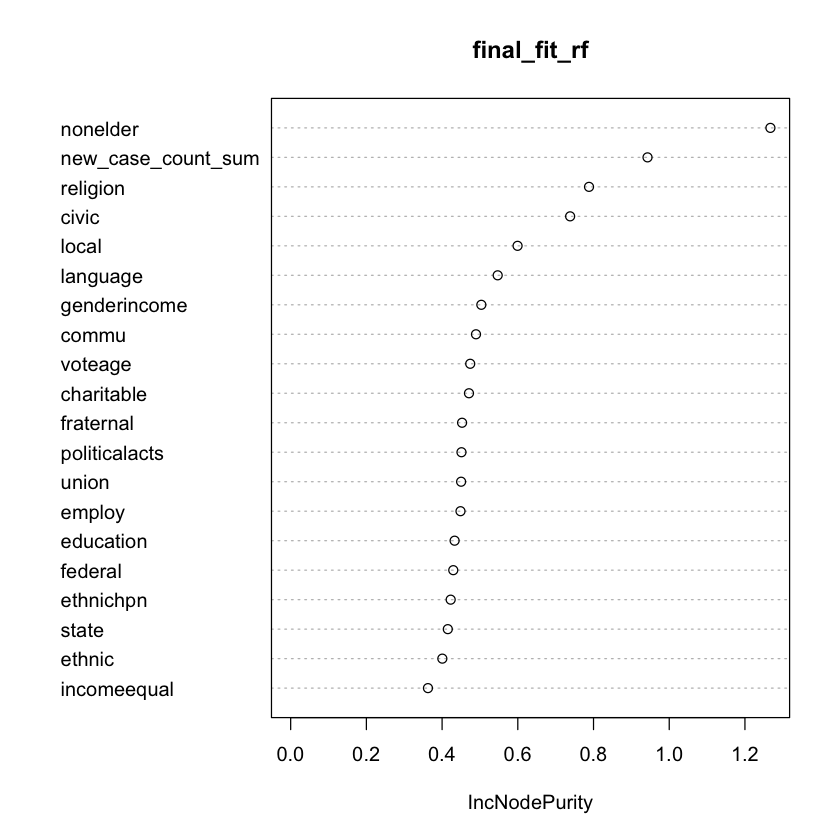

In [62]:
varImpPlot(final_fit_rf)

# naive_roc_auc_score

In [63]:
naive_roc_auc_score <- function(y_true, y_pred) {
    num_same_sign <- 0
    num_pairs <- 0 
    
    for(a in 1:length(y_true))
    {
        for(b in 1:length(y_true))
        {
            if (y_true[a] > y_true[b]) {
                
                num_pairs <- num_pairs + 1
                
                if (y_pred[a] > y_pred[b]) {
                
                    num_same_sign <- num_same_sign + 1
                }
                else if (y_pred[a] == y_pred[b]) {
                    
                    num_same_sign <- num_same_sign + .5
                }
            }
        }
    }
    num_same_sign / num_pairs
}

In [65]:
naive_roc_auc_score(TEST$avg_perc_change_emp, y_hat)

[1] 0.9200865